In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

hr = pd.read_csv("hr.csv")
hr = hr.rename(columns = {"number_project":"n_projects", 
                          "time_spend_company":"n_years", 
                          "average_montly_hours":"average_monthly_hours"})
hr.head()


,satisfaction_level,last_evaluation,n_projects,average_monthly_hours,n_years,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Our dataset has 10 variables describing characteristics of 14999 employees at an undisclosed company. **satisfaction_level** is a numeric variable describing the self reported level of satisfaction of the employee as a percentage from 0-100, **last_evaluation** is a numeric variable describing the employer's evaluation of the employee's performance as a percentage, **n_projects** is an integer variable of the number of projects the employee worked on, **average_monthly_hours** is a numeric variable measuring the average number of hours the employee works each month (around 160 is an average 40 hour work week), **n_years** is an integer variable measuring the number of years the employee has worked at the company, **Work_accident** is a binary classifier describing if the employee was involved in a work accident, **promotion_last_5years** is a binary classifier for if the employee received a promotion in the last 5 years, **department** is a categorical variable describing which department the employee worked in, **salary** is a categorical variable describing the relative salary level of the employee, and **left** is our binary outcome variable describing if the employee left the company or not. Below is a table of descriptive statistics of the distribution of the numerical, integer, and binary variables.

In [49]:
hr.describe()

,satisfaction_level,last_evaluation,n_projects,average_monthly_hours,n_years,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [50]:
pd.crosstab(hr.salary, hr.left, normalize = 'index')

left,0,1
salary,,
high,0.933711,0.066289
low,0.703116,0.296884
medium,0.795687,0.204313


<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

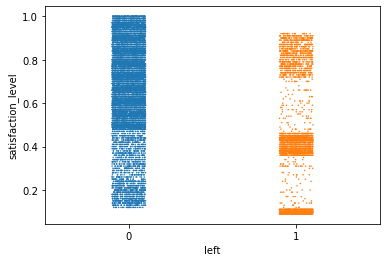

In [51]:
sns.stripplot(data = hr, x = "left", y = "satisfaction_level", size = 1.5)

/Users/mikehatfieldiv/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

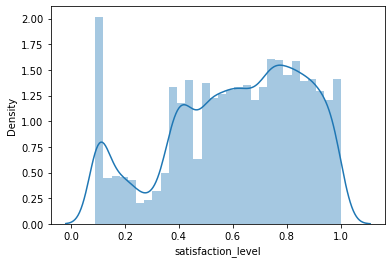

In [52]:
sns.distplot(hr.satisfaction_level)

In [53]:
pd.crosstab(
    pd.cut(hr.satisfaction_level, 5, labels = ["0-20", "20-40", "40-60", "60-80", "80-100"]), 
    hr.left,
    normalize = "index")

left,0,1
satisfaction_level,,
0-20,0.486634,0.513366
20-40,0.325055,0.674945
40-60,0.954097,0.045903
60-80,0.881277,0.118723
80-100,0.868324,0.131676


<AxesSubplot:xlabel='left', ylabel='average_monthly_hours'>

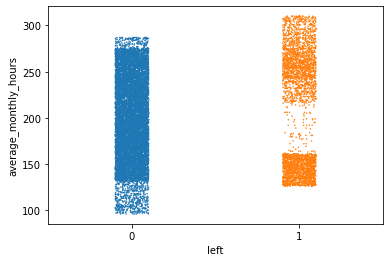

In [56]:
sns.stripplot(data = hr, x = "left", y = "average_monthly_hours", size = 1.5)

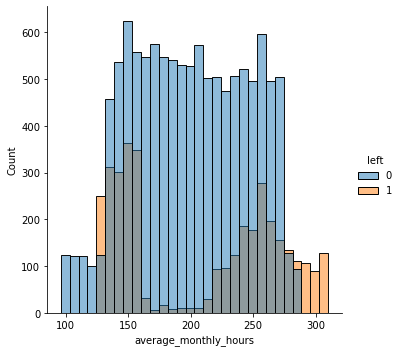

In [71]:
sns.displot(x = hr.average_monthly_hours, hue = hr.left, kind = "hist")

In [55]:
pd.crosstab(
    pd.cut(hr.average_monthly_hours, 5), 
    hr.left,
    normalize = "index")

left,0,1
average_monthly_hours,,
"(95.786, 138.8]",0.651525,0.348475
"(138.8, 181.6]",0.760269,0.239731
"(181.6, 224.4]",0.951198,0.048802
"(224.4, 267.2]",0.745779,0.254221
"(267.2, 310.0]",0.499655,0.500345
